# Notebook 2: Hypothesis Testing

## Objectives
By the end of this notebook, you will be able to:
1.  **Understand Hypothesis Testing**: Null vs. Alternative hypotheses.
2.  **Perform T-Tests**: One-sample and two-sample t-tests.
3.  **Interpret P-values**: What they mean and what they don't.
4.  **Apply Best Practices**: Use `pingouin` for comprehensive statistical reporting.

## Prerequisites
-   Notebook 1 (Sampling)
-   Understanding of mean and standard deviation.


## Part 1: The Framework

1.  **Null Hypothesis ($H_0$)**: There is no effect / no difference.
2.  **Alternative Hypothesis ($H_1$)**: There is an effect / difference.
3.  **P-value**: The probability of observing data as extreme as ours, assuming $H_0$ is true.
    *   If p < 0.05, we reject $H_0$.


In [1]:
import numpy as np
import pandas as pd
from scipy import stats

# Load Auto MPG data (simulated)
# In lecture: 'Auto.csv'
try:
    import seaborn as sns
    df = sns.load_dataset('mpg').dropna()
except:
    # Fallback
    df = pd.DataFrame({'mpg': np.random.normal(25, 5, 100), 'origin': np.random.choice(['usa', 'japan'], 100)})

usa_mpg = df[df['origin'] == 'usa']['mpg']
japan_mpg = df[df['origin'] == 'japan']['mpg']

print(f"USA Mean MPG: {usa_mpg.mean():.2f}")
print(f"Japan Mean MPG: {japan_mpg.mean():.2f}")

# Two-sample T-test
t_stat, p_val = stats.ttest_ind(usa_mpg, japan_mpg)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")


USA Mean MPG: 20.03
Japan Mean MPG: 30.45
T-statistic: -12.66, P-value: 0.0000


## Part 2: Errors

*   **Type I Error (False Positive)**: Rejecting $H_0$ when it is actually true. (Controlled by $\alpha = 0.05$).
*   **Type II Error (False Negative)**: Failing to reject $H_0$ when $H_1$ is true.


## Exercises

### Task 1: One-Sample T-Test
1.  Test if the average MPG of **all cars** in the dataset is significantly different from 20.
    *   *Hint*: Use `stats.ttest_1samp`.

### Task 2: Visualizing Distributions
1.  Plot the histograms of MPG for USA vs Japan cars on the same plot.
2.  Add vertical lines for their means.


One-sample P-value: 0.0000


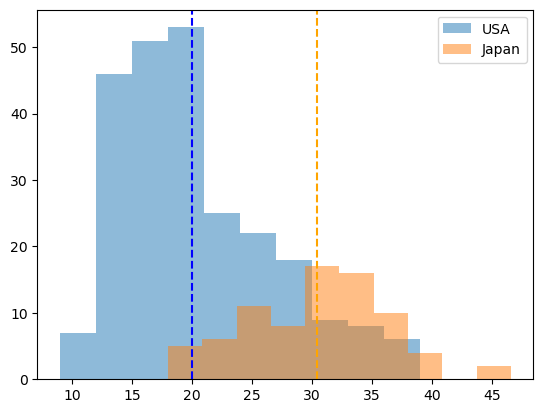

In [2]:
# --- SOLUTION TASK 1 ---
t_stat_1, p_val_1 = stats.ttest_1samp(df['mpg'], 20)
print(f"One-sample P-value: {p_val_1:.4f}")

# --- SOLUTION TASK 2 ---
import matplotlib.pyplot as plt
plt.hist(usa_mpg, alpha=0.5, label='USA')
plt.hist(japan_mpg, alpha=0.5, label='Japan')
plt.axvline(usa_mpg.mean(), color='blue', linestyle='--')
plt.axvline(japan_mpg.mean(), color='orange', linestyle='--')
plt.legend()
plt.show()


## Industry Best Practices

### Pingouin
The `scipy.stats` library is great, but `pingouin` gives you more information (like effect sizes and Bayes factors) in a nice pandas DataFrame.

```python
# pip install pingouin
# import pingouin as pg
# pg.ttest(usa_mpg, japan_mpg)
```

### Check Assumptions
T-tests assume normality and equal variances. Always check these assumptions (e.g., Shapiro-Wilk test, Levene's test) or use non-parametric alternatives (Mann-Whitney U test) if violated.
